# **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loading & Reading Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Python/Datasets/EDA/data.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['total_score']= df['math_score'] + df['reading_score'] + df['writing_score']
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [5]:
df['average_score'] =  round(df['total_score']/3)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [7]:
#list of columns in our dataset
columns = df[['gender', 'race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]

#loop through each coloumns and see the unique values
for column in columns:
  unique_values = df[column].unique()
  print(f"Unique values in '{column}': {unique_values}")

Unique values in 'gender': ['female' 'male']
Unique values in 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in 'lunch': ['standard' 'free/reduced']
Unique values in 'test_preparation_course': ['none' 'completed']


# **Univariate Analysis**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
total_score,1000.0,203.312,42.771978,27.0,175.00,205.0,233.0,300.0
average_score,1000.0,67.762,14.258354,9.0,58.00,68.0,78.0,100.0


**Interpretations:**
* Looking at the Scores, it apears that, on average students are doing fairly well in their exams.
* Math, Reading, Writing scores are quit similar means students are maintaining a cinsistant level of performance across these subjects
* the total_score gives as un idea of their overall achivement, and it's around two thirds of maximum possible score, which indicates a solid academic performance among this group of students.

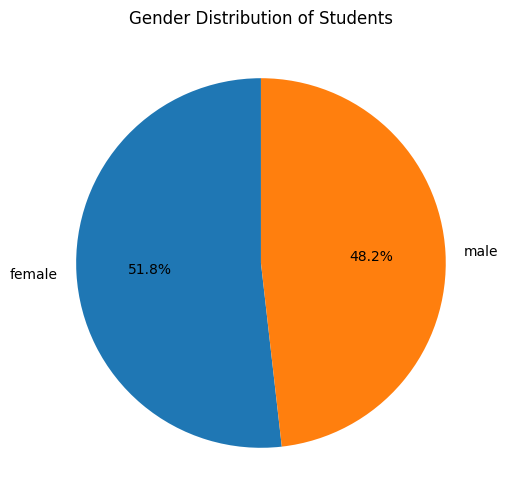

In [9]:
#calculate the count of students in each gender category
gender_counts = df['gender'].value_counts()

#calculate the perchantage of students in each gender category
gender_perchantage = (gender_counts / len(df)) * 100

#pie chart to visualize the results
plt.figure(figsize=(6,6))
plt.pie(gender_perchantage, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Students')
plt.show()

**Info:**
* We can see that female students are in more numbers than male students.

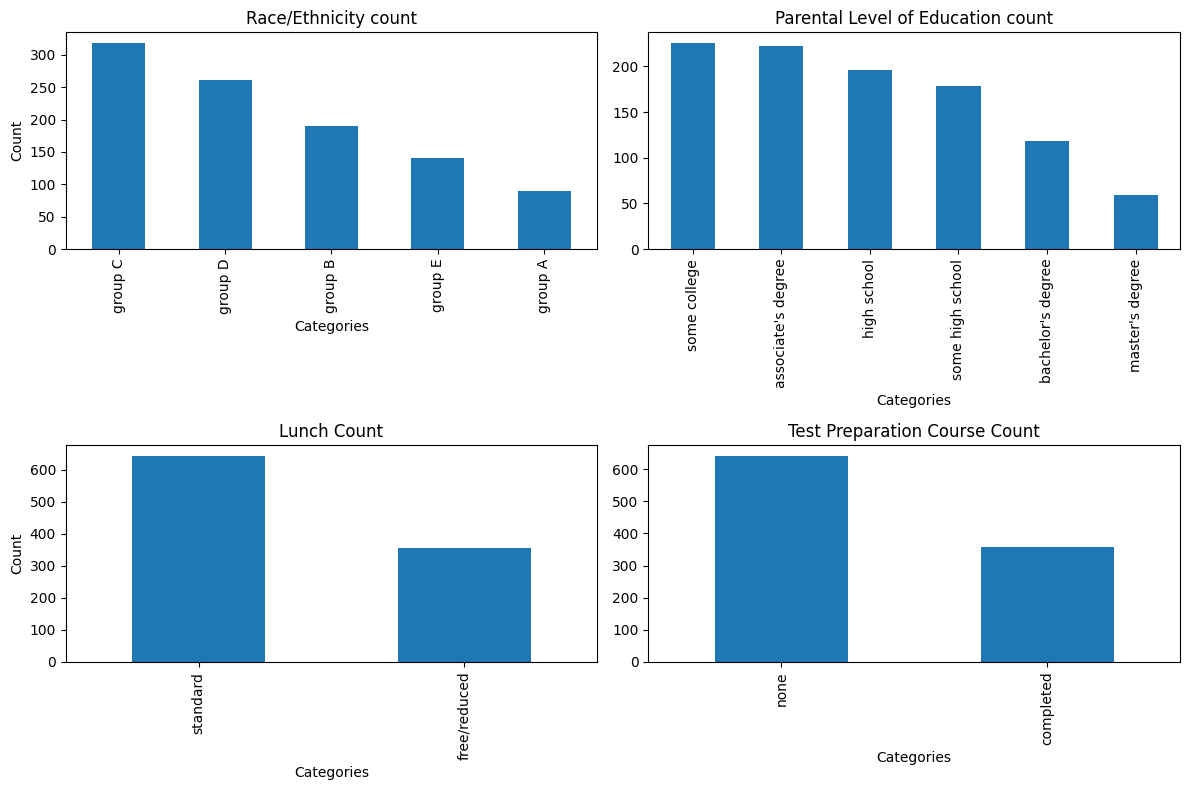

In [16]:
race_counts = df['race_ethnicity'].value_counts()
race_percentages = (race_counts / len(df)) * 100

parental_counts = df['parental_level_of_education'].value_counts()
parental_percentages = (parental_counts / len(df)) * 100

lunch_counts = df['lunch'].value_counts()
lunch_percentages = (lunch_counts / len(df)) * 100

prep_counts = df['test_preparation_course'].value_counts()
prep_perchantages = (prep_counts / len(df))*100

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))

# Plot the stacked bar charts for each variables
race_counts.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Race/Ethnicity count')

parental_counts.plot (kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Parental Level of Education count')

lunch_counts.plot(kind='bar', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Lunch Count')

prep_counts.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Test Preparation Course Count')

# Set labels for the x-axes
for ax in axes.flat:
    ax.set_xlabel('Categories')

# Set labels for the y-axes
axes[0,0].set_ylabel('Count')
axes[1,0].set_ylabel('Count')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


**Info:**
* We can see that race/ethinicity the group C students are in more numbers than others and also Group A is the smallest number of students in a Ethnicity.
* Very less parents of students have done masters and bachelors degree where most of them have studied in some college and done some associate degree and also we can see that few have finished their high school.
* Students getting standard food are greater than students who are getting free food.
* Many students had not completed test preparation course, only 300 students had completed out of 1000 students

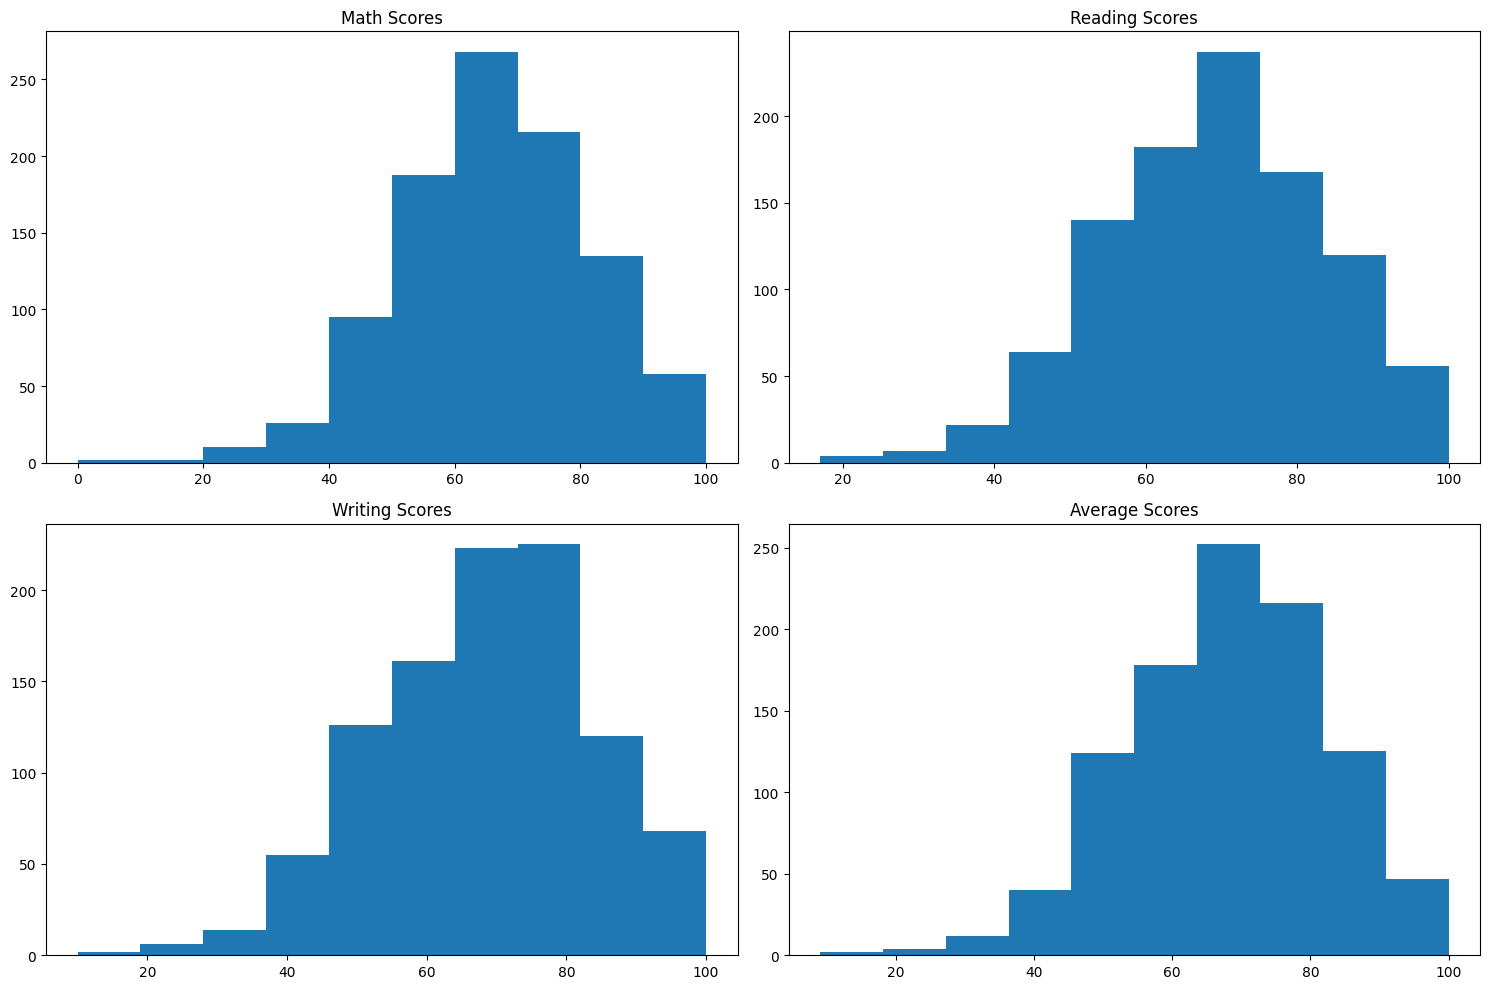

In [17]:
# Create 3x2 subplot grid
fig, axs = plt.subplots(2,2, figsize=(15, 10))

# Math histogram
axs[0,0].hist(df['math_score'])
axs[0,0].set_title('Math Scores')

# Reading histogram
axs[0,1].hist(df['reading_score'])
axs[0,1].set_title('Reading Scores')

# Writing histogram
axs[1,0].hist(df['writing_score'])
axs[1,0].set_title('Writing Scores')

# Average histogram
axs[1,1].hist(df['average_score'])
axs[1,1].set_title('Average Scores')

# Tighten layout and show plot
fig.tight_layout()
plt.show()

**Info:**
* All of the 4 scores seems like following normal distribution but we can notice that there is spame devaition towards lower scores from the mean score which may cause outliers.